In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats

In [199]:
df = pd.read_csv(r'NYC_Airbnb/development.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12783632,NYC Mini Hotel,57230304,Imanuelly,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,2019-05-26,0.92,3,351
1,3463385,Gorgeous room in Manhattan,10698270,Evgenia,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2019-05-27,3.31,2,263
2,17572926,Great 1 Bedroom on Upper East,36578169,James,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,NaN,1,0
3,33913644,"Modern and bright 2Bed 2Bath Bushwick, Brooklyn",50981314,Ofier,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,2019-07-07,1.64,1,89
4,9405895,Stylish and zen Brooklyn retreat,48775347,Mathieu,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,2019-04-20,0.42,1,103


In [200]:
df.describe()
len(df)

39116

In [201]:
# null values in df
df.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                           19
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8041
reviews_per_month                 8041
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [202]:
# removing rows with no name, host_name, last_review or reviews_per_month
df = df[df.name.isna() == False]
df = df[df.host_name.isna() == False]
df = df[df.last_review.isna() == False]
df = df[df.reviews_per_month != 0]
len(df)

31056

In [203]:
# null values in df
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<AxesSubplot:>

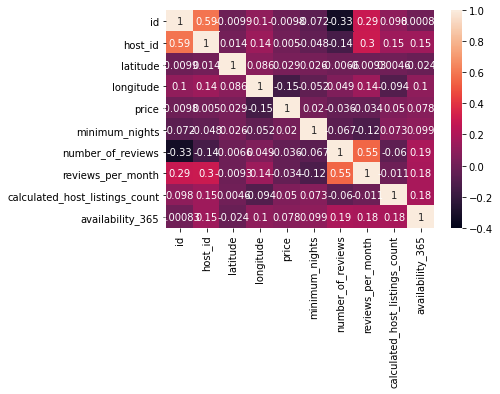

In [204]:
corr = df.corr()
sns.heatmap(corr,annot=True,vmin=-0.4,vmax=1)

In [205]:
# removing useless features
df.drop(['id','name','host_name','last_review'],axis=1,inplace=True)
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,57230304,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,0.92,3,351
1,10698270,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,3.31,2,263
3,50981314,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,1.64,1,89
4,48775347,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,0.42,1,103
5,1603343,Brooklyn,Bushwick,40.70403,-73.91276,Entire home/apt,225,2,3,0.06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39111,147972663,Brooklyn,East Flatbush,40.64850,-73.93855,Private room,40,3,58,2.57,3,306
39112,223032162,Brooklyn,Boerum Hill,40.68602,-73.99023,Private room,65,2,15,1.80,2,0
39113,10603767,Brooklyn,Bushwick,40.70784,-73.92224,Entire home/apt,150,3,203,3.42,1,308
39114,12290324,Brooklyn,Williamsburg,40.71952,-73.96281,Entire home/apt,250,5,21,0.35,1,284


# Exploratory Data Analysis

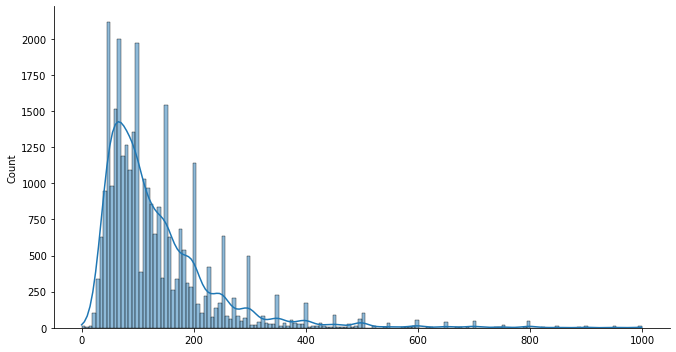

In [206]:
thrsehold_outliers = 1000  # removing outliers for plotting
prices = df[df.price < thrsehold_outliers].price.values
sns.displot(prices,kde=True,height=5,aspect=1.9)

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

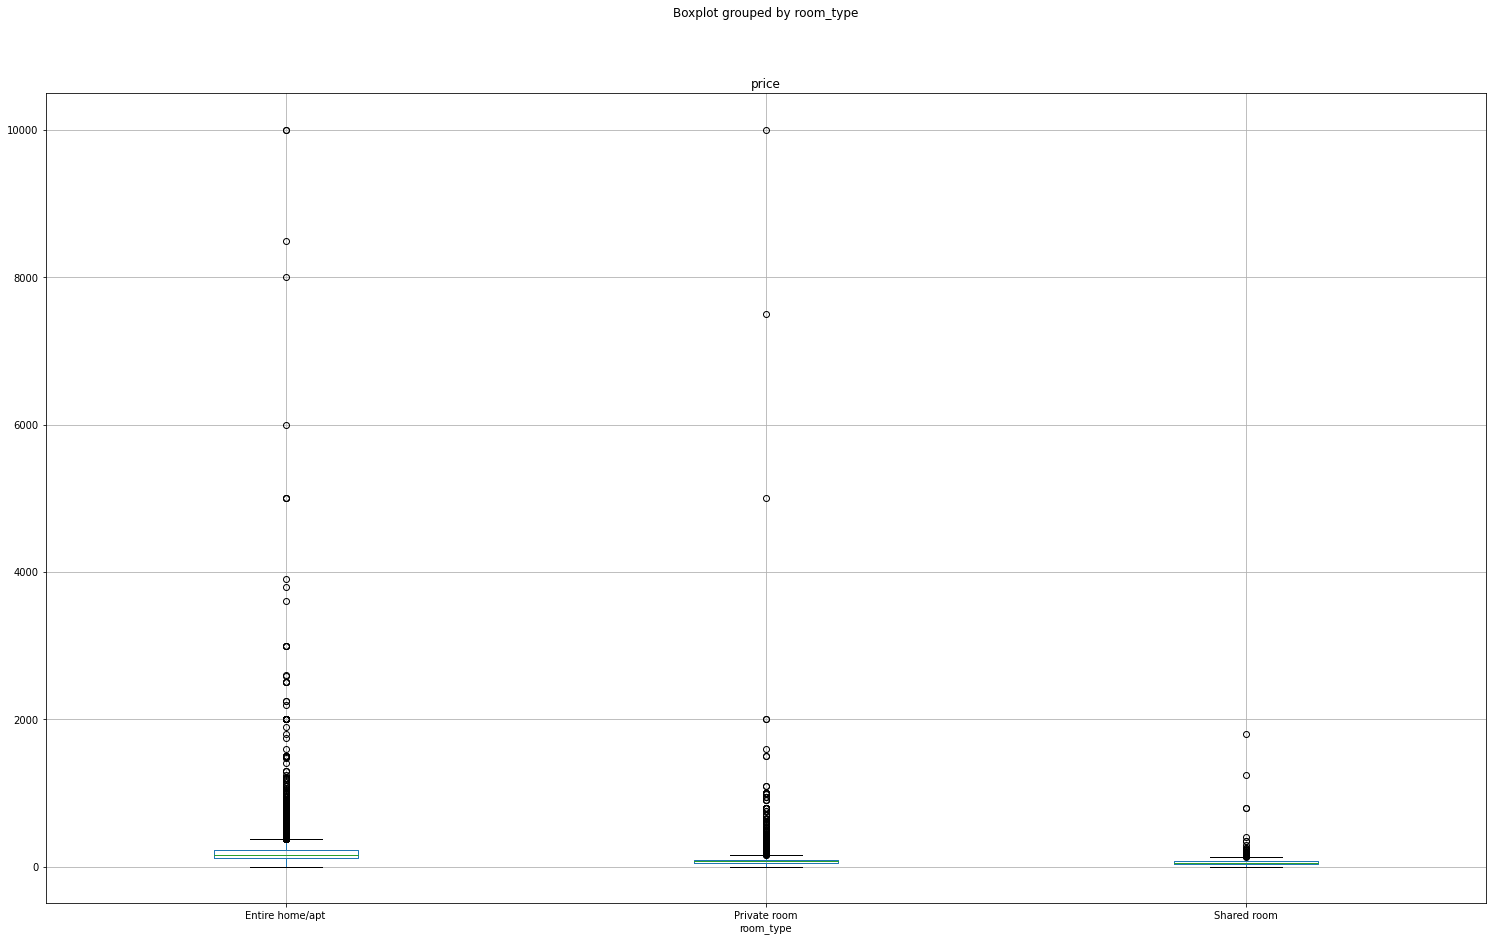

In [207]:
df.boxplot(column='price',by='room_type',figsize=(25,15))

<AxesSubplot:title={'center':'price'}, xlabel='neighbourhood_group'>

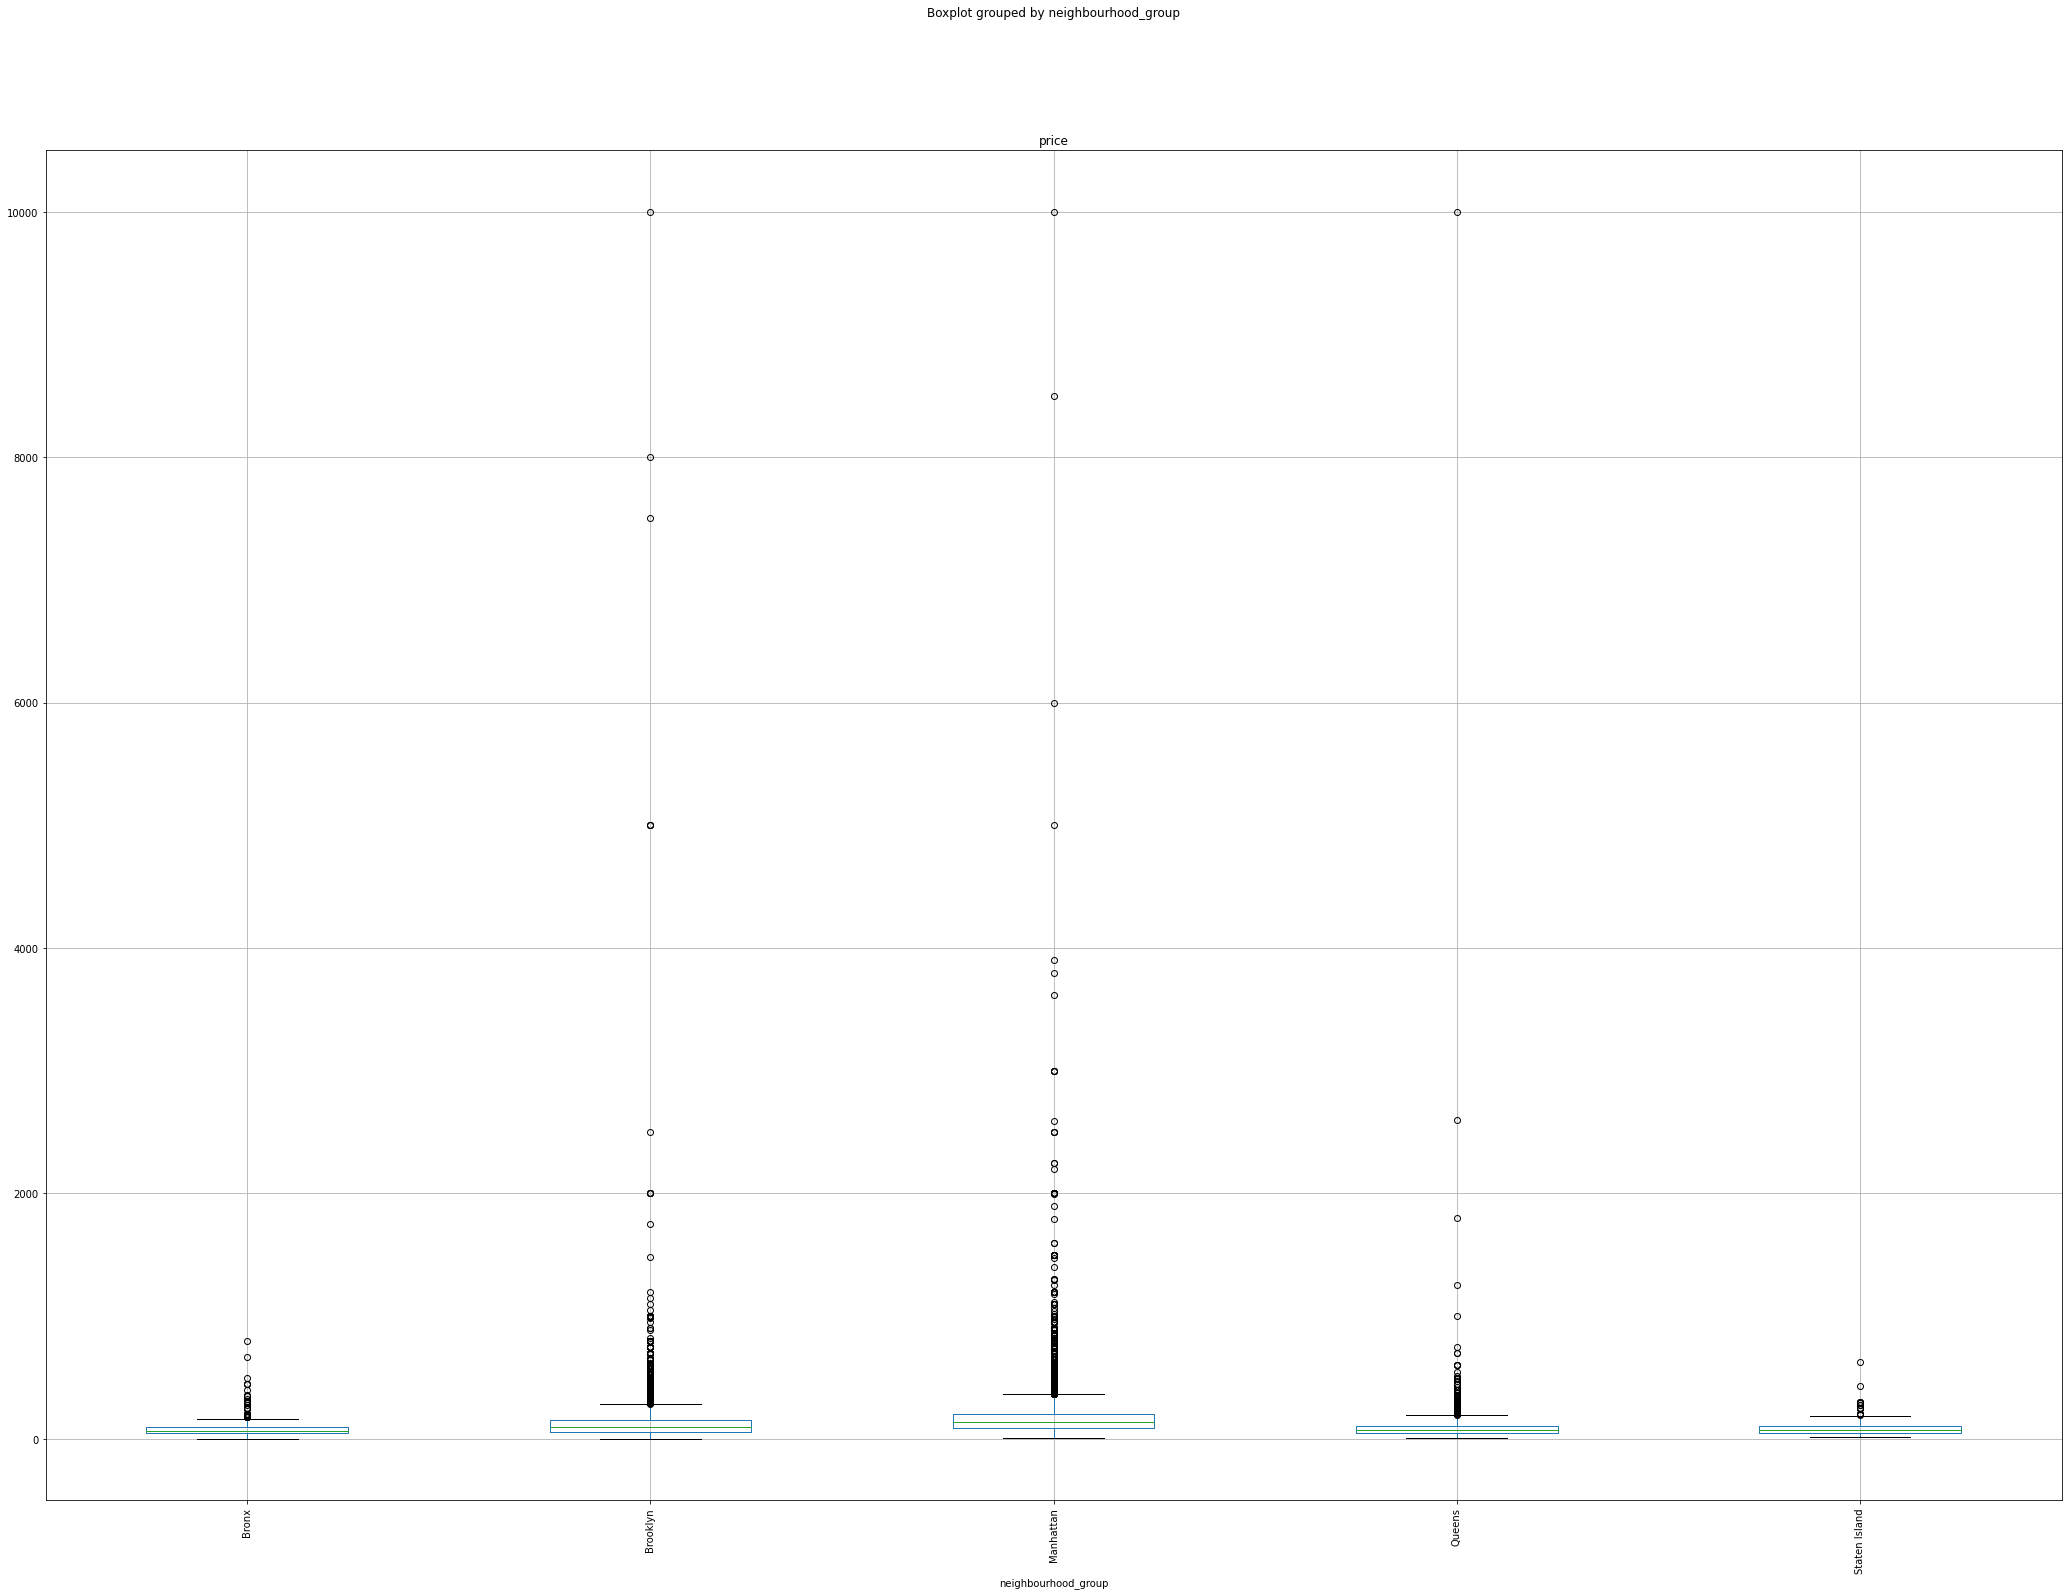

In [208]:
df.boxplot(column='price',by='neighbourhood_group',figsize=(35,25),rot=90)

In [209]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,57230304,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,0.92,3,351
1,10698270,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,3.31,2,263
3,50981314,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,1.64,1,89
4,48775347,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,0.42,1,103
5,1603343,Brooklyn,Bushwick,40.70403,-73.91276,Entire home/apt,225,2,3,0.06,1,0


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

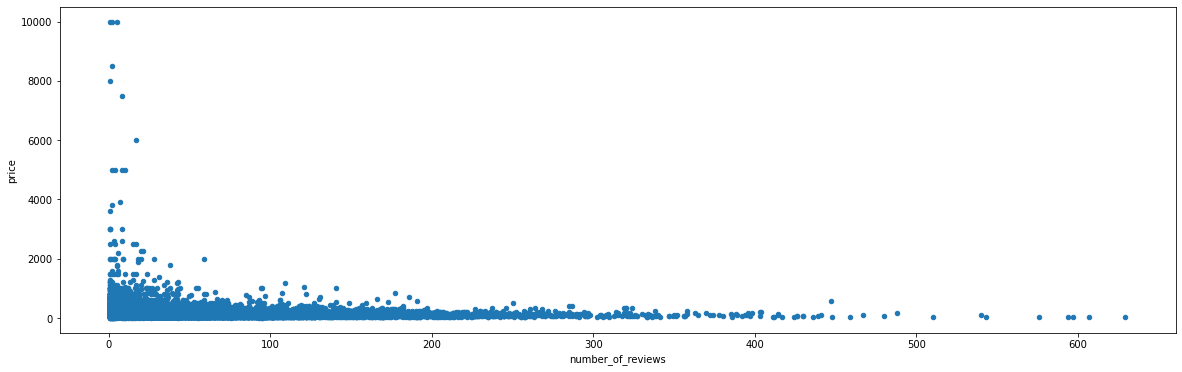

In [210]:
df.plot.scatter(x='number_of_reviews',y='price',figsize=(20,6))
# more reviews -> less price

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

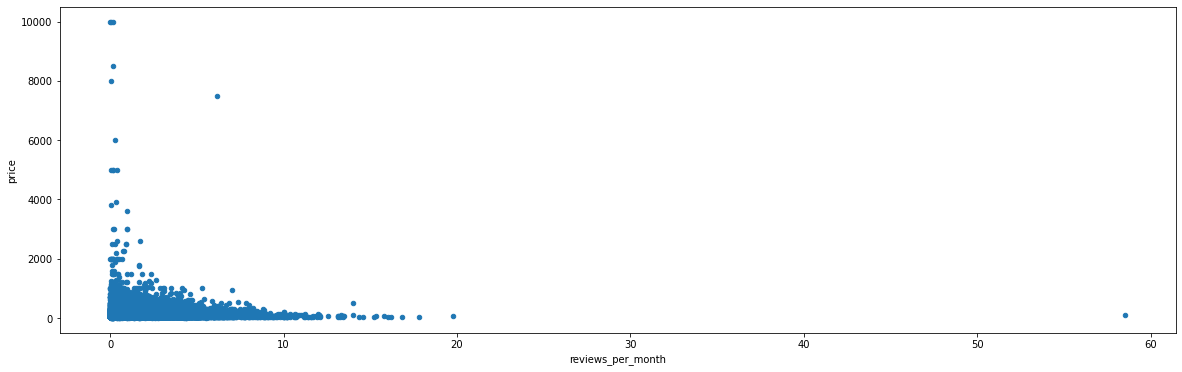

In [211]:
df.plot.scatter(x='reviews_per_month',y='price',figsize=(20,6))

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

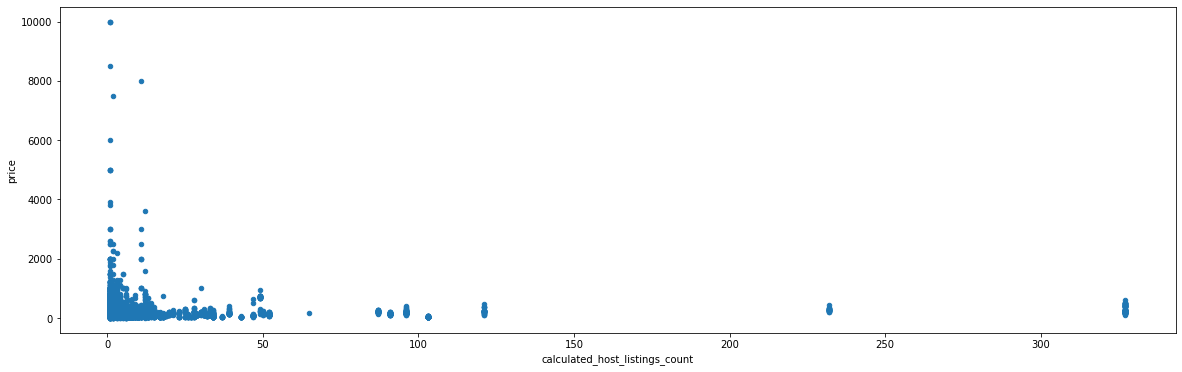

In [212]:
df.plot.scatter(x='calculated_host_listings_count',y='price',figsize=(20,6))
# seems not very useful feature

In [213]:
# seems not very useful

<AxesSubplot:xlabel='availability_365', ylabel='price'>

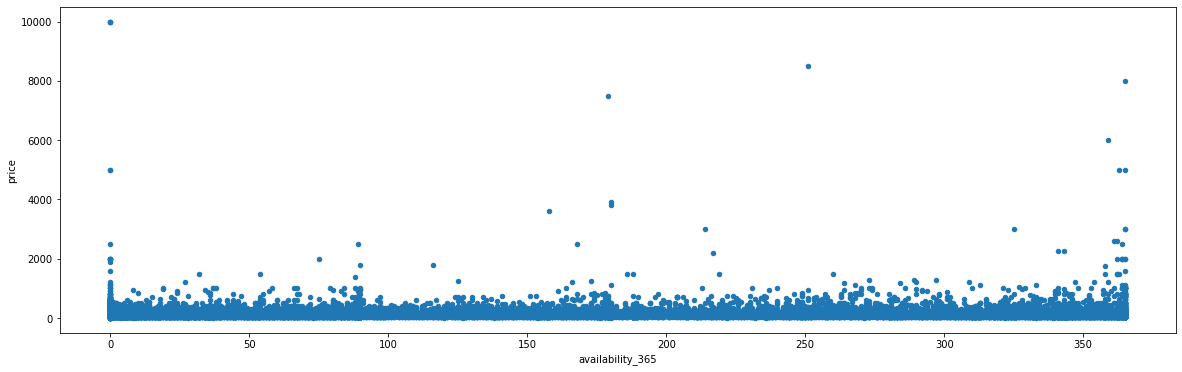

In [214]:
df.plot.scatter(x='availability_365',y='price',figsize=(20,6))
# not useful feature

<AxesSubplot:xlabel='room_type', ylabel='price'>

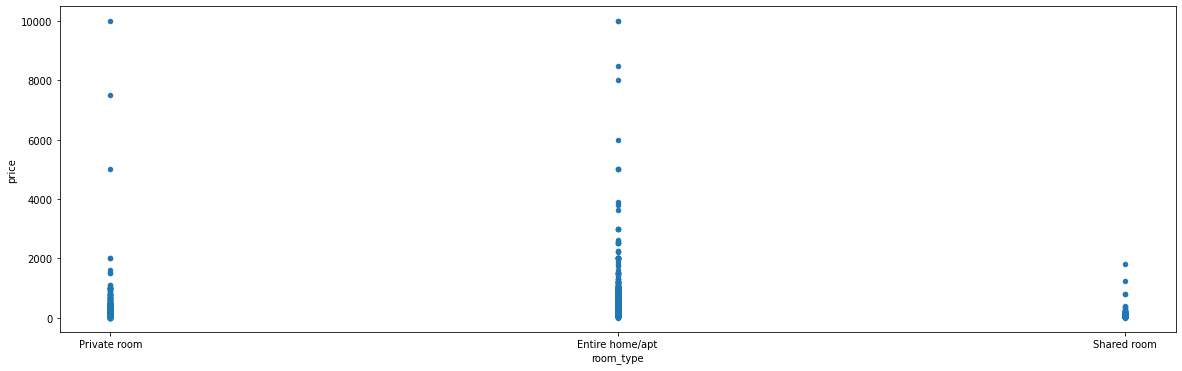

In [215]:
df.plot.scatter(x='room_type',y='price',figsize=(20,6))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

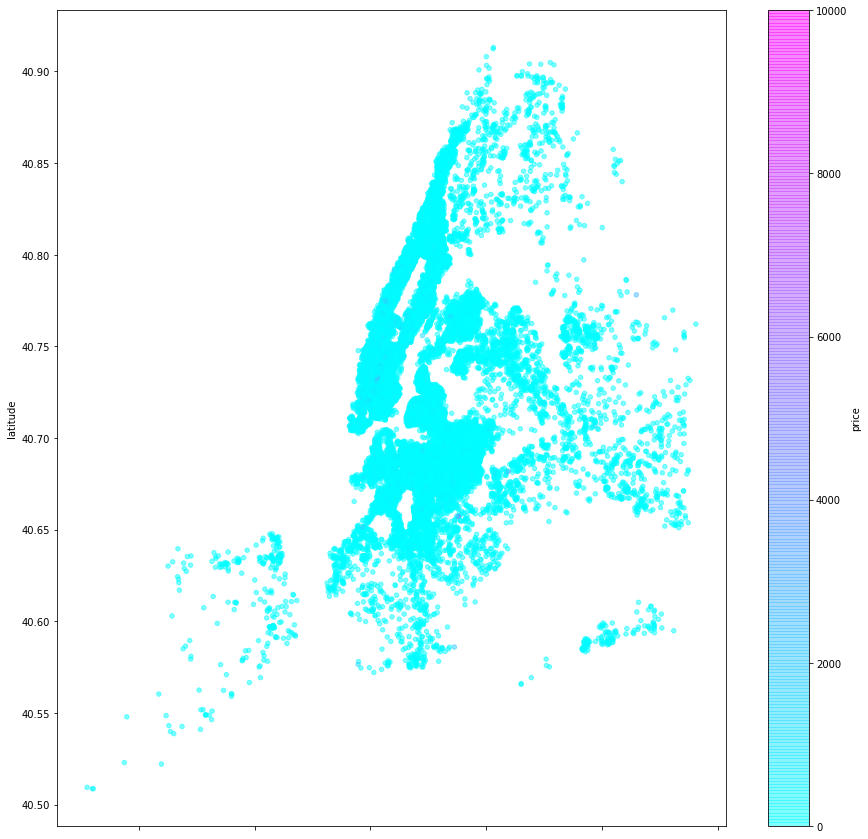

In [216]:
df.plot.scatter(x='longitude',y='latitude',c='price',figsize=(15,15),cmap='cool',alpha=0.5)
# outliers...

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

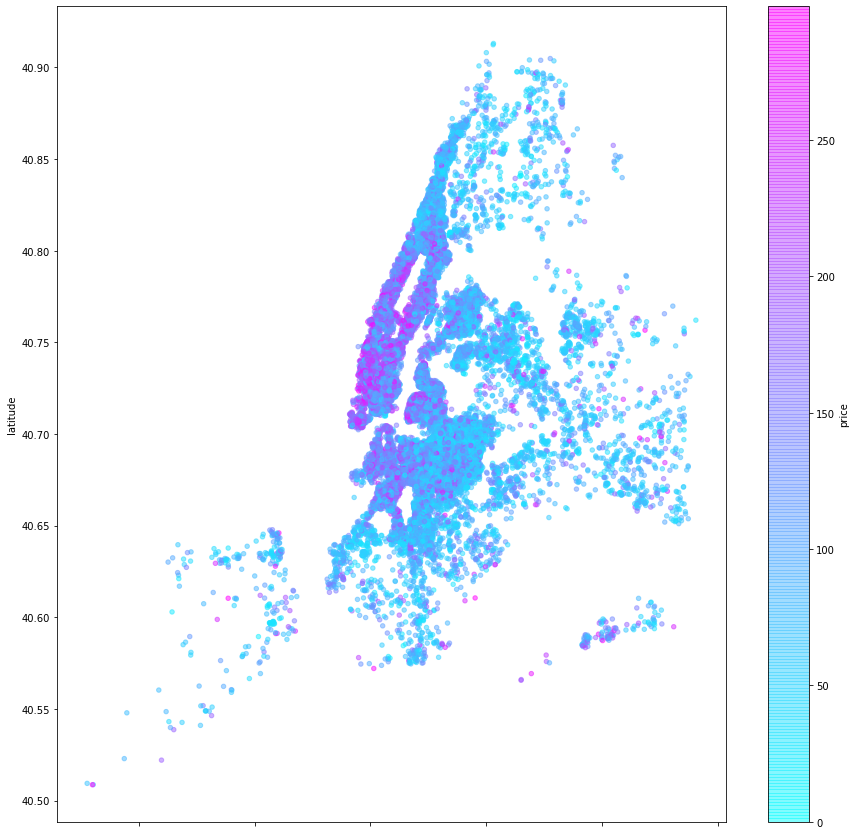

In [217]:
df[df.price < 300].plot.scatter(x='longitude',y='latitude',c='price',figsize=(15,15),cmap='cool',alpha=0.5)

# Features engineering

In [218]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,57230304,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,0.92,3,351
1,10698270,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,3.31,2,263
3,50981314,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,1.64,1,89
4,48775347,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,0.42,1,103
5,1603343,Brooklyn,Bushwick,40.70403,-73.91276,Entire home/apt,225,2,3,0.06,1,0


In [219]:
# removing useless columns
df.drop(['minimum_nights','reviews_per_month','calculated_host_listings_count','availability_365'],axis=1,inplace=True)
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,57230304,Queens,Elmhurst,40.74037,-73.88610,Private room,75,2
1,10698270,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,202
3,50981314,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,4
4,48775347,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,16
5,1603343,Brooklyn,Bushwick,40.70403,-73.91276,Entire home/apt,225,3
...,...,...,...,...,...,...,...,...
39111,147972663,Brooklyn,East Flatbush,40.64850,-73.93855,Private room,40,58
39112,223032162,Brooklyn,Boerum Hill,40.68602,-73.99023,Private room,65,15
39113,10603767,Brooklyn,Bushwick,40.70784,-73.92224,Entire home/apt,150,203
39114,12290324,Brooklyn,Williamsburg,40.71952,-73.96281,Entire home/apt,250,21


<AxesSubplot:>

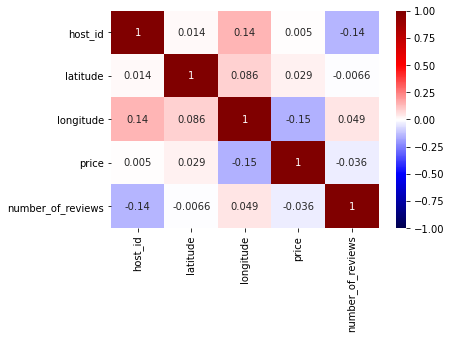

In [220]:
sns.heatmap(df.corr(),cmap="seismic",annot=True,vmin=-1,vmax=1)

Skewness: 23.752547
Kurtosis: 957.156904


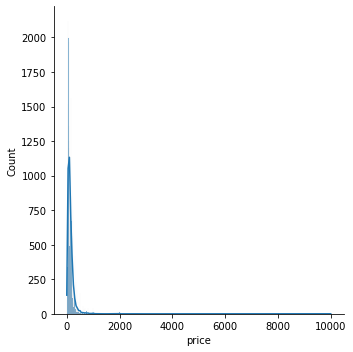

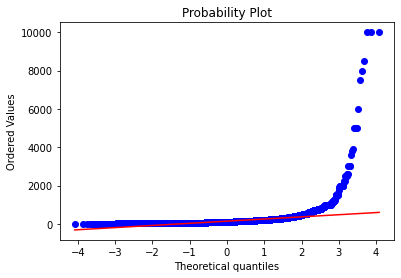

In [221]:
sns.displot(df['price'], kde=True,);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

In [222]:
df = df[df['price']<=500]

Skewness: 1.614064
Kurtosis: 3.148190


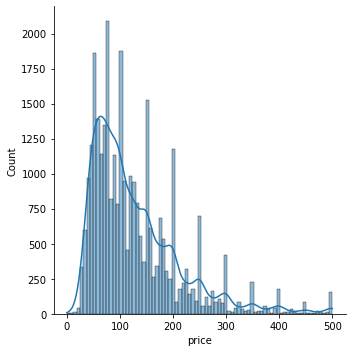

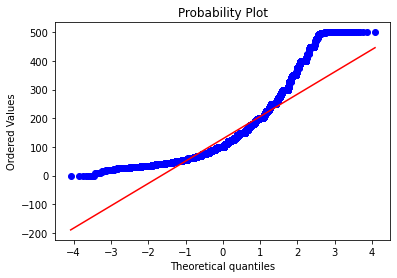

In [223]:
sns.displot(df['price'], kde=True,);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

In [224]:
# encoding columns
room_types = df.room_type.unique()
neighbourhood_groups = df.neighbourhood_group.unique()
neighbourhoods = df.neighbourhood.unique()

def encode_strings(strings):
    dict = {}
    id = 0
    for string in strings:
        dict[string] = id
        id = id+1
    return dict

room_types_dict = encode_strings(room_types)
neighbourhood_groups_dict = encode_strings(neighbourhood_groups)
neighbourhoods_dict = encode_strings(neighbourhoods)

In [225]:
df.neighbourhood_group = df.neighbourhood_group.apply(lambda x: neighbourhood_groups_dict[x])
df.room_type = df.room_type.apply(lambda x: room_types_dict[x])
df.neighbourhood = df.neighbourhood.apply(lambda x: neighbourhoods_dict[x])
df

c:\users\andrea\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,57230304,0,0,40.74037,-73.88610,0,75,2
1,10698270,1,1,40.76717,-73.95532,0,95,202
3,50981314,2,2,40.70205,-73.91338,1,150,4
4,48775347,2,3,40.68914,-73.97853,1,325,16
5,1603343,2,2,40.70403,-73.91276,1,225,3
...,...,...,...,...,...,...,...,...
39111,147972663,2,14,40.64850,-73.93855,0,40,58
39112,223032162,2,6,40.68602,-73.99023,0,65,15
39113,10603767,2,2,40.70784,-73.92224,1,150,203
39114,12290324,2,8,40.71952,-73.96281,1,250,21


In [226]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,57230304,0,0,40.74037,-73.88610,0,75,2
1,10698270,1,1,40.76717,-73.95532,0,95,202
3,50981314,2,2,40.70205,-73.91338,1,150,4
4,48775347,2,3,40.68914,-73.97853,1,325,16
5,1603343,2,2,40.70403,-73.91276,1,225,3


In [227]:
y = df.price
X = df.drop(columns=['price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [228]:
X_train

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,number_of_reviews
963,652539,1,32,40.79097,-73.96885,1,2
7394,15640230,2,25,40.66571,-73.93380,0,5
36926,24595747,1,32,40.77972,-73.97871,0,7
19105,7088204,2,25,40.67131,-73.94979,1,8
21674,1144721,2,2,40.70720,-73.92245,1,17
...,...,...,...,...,...,...,...
5454,107180958,2,25,40.67692,-73.94038,2,2
18467,16323240,0,34,40.74480,-73.92364,0,2
15588,212157854,3,106,40.83659,-73.91777,0,1
34588,30237517,0,88,40.73437,-73.85227,1,2


In [236]:
reg = make_pipeline(PolynomialFeatures(2),RandomForestRegressor())
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.4594341450840034


In [238]:
y_pred

array([ 68.47, 118.12, 130.75, ..., 147.11, 131.32, 122.27])

In [239]:
df.number_of_reviews.value_counts()

1      4123
2      2719
3      1978
4      1566
5      1270
       ... 
274       1
290       1
306       1
374       1
607       1
Name: number_of_reviews, Length: 377, dtype: int64

In [240]:
df = pd.read_csv(r'NYC_Airbnb/evaluation.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,2017-10-05,0.40,1,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,2,118,2017-07-21,0.99,1,0
3,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1,160,2019-06-09,1.33,4,188
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,36478343,Welcome all as family,274273284,Anastasia,Manhattan,East Harlem,40.78749,-73.94749,Private room,1,0,NaN,NaN,1,180
9775,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,1,0,NaN,NaN,3,365
9776,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,2,0,NaN,NaN,2,353
9777,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,NaN,NaN,2,9


In [241]:
df.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.779000e+03,9.779000e+03,9779.000000,9779.000000,9779.000000,9779.000000,7768.000000,9779.000000,9779.000000
mean,1.904292e+07,6.797568e+07,40.728597,-73.951617,6.937519,23.325698,1.360242,6.900603,112.076184
std,1.088057e+07,7.851607e+07,0.055156,0.047246,20.576252,44.348447,1.669525,32.316666,131.810358
min,2.539000e+03,2.787000e+03,40.499790,-74.240840,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.692291e+06,7.791006e+06,40.689530,-73.982630,1.000000,1.000000,0.200000,1.000000,0.000000
50%,1.964239e+07,3.169801e+07,40.722420,-73.955570,2.000000,5.000000,0.710000,1.000000,42.000000
75%,2.901323e+07,1.074344e+08,40.763060,-73.935455,5.000000,24.000000,2.002500,2.000000,230.000000
max,3.648506e+07,2.742733e+08,40.911670,-73.712990,1000.000000,474.000000,27.950000,327.000000,365.000000


In [242]:
ids = df.id
df.drop(['id','name','host_name','last_review'],axis=1,inplace=True)
df.drop(['minimum_nights','reviews_per_month','calculated_host_listings_count','availability_365'],axis=1,inplace=True)
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,number_of_reviews
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,9
1,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,49
2,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,118
3,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,160
4,15991,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,148
...,...,...,...,...,...,...,...
9774,274273284,Manhattan,East Harlem,40.78749,-73.94749,Private room,0
9775,208514239,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,0
9776,131529729,Manhattan,East Harlem,40.79633,-73.93605,Private room,0
9777,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,0


In [243]:
# encoding columns
room_types = df.room_type.unique()
neighbourhood_groups = df.neighbourhood_group.unique()
neighbourhoods = df.neighbourhood.unique()
room_types_dict = encode_strings(room_types)
neighbourhood_groups_dict = encode_strings(neighbourhood_groups)
neighbourhoods_dict = encode_strings(neighbourhoods)
df.neighbourhood_group = df.neighbourhood_group.apply(lambda x: neighbourhood_groups_dict[x])
df.room_type = df.room_type.apply(lambda x: room_types_dict[x])
df.neighbourhood = df.neighbourhood.apply(lambda x: neighbourhoods_dict[x])
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,number_of_reviews
0,2787,0,0,40.64749,-73.97237,0,9
1,7356,0,1,40.68688,-73.95596,0,49
2,7490,1,2,40.80178,-73.96723,0,118
3,7549,1,3,40.71344,-73.99037,1,160
4,15991,0,4,40.70837,-73.95352,1,148
...,...,...,...,...,...,...,...
9774,274273284,1,7,40.78749,-73.94749,0,0
9775,208514239,0,4,40.71232,-73.94220,1,0
9776,131529729,1,7,40.79633,-73.93605,0,0
9777,8232441,0,1,40.67853,-73.94995,0,0


In [244]:
y_pred = reg.predict(df)
y_pred

array([157.87, 127.17, 115.94, ..., 191.75, 142.73, 275.69])

In [245]:
df = pd.DataFrame({"Id": ids, "Predicted": y_pred})
df.to_csv("mypredictions.csv",sep=",",index=False)